# Effect of different attributes on People's Trip Duration 
# By Reham ElTagoury

## Investigation Overview

In this investigation, I wanted to know if I can Predict the Duration of the trip from studying diffrent attributes. The main focus was on User type , gender and birth year.

## Dataset Overview

In this Dataset there are over 18K trips made by people with different features I'm intersted in studying the effect of the User type , gender and birth year on the duration of the trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
trip_data = pd.read_csv('201902-fordgobike-tripdata.csv')


In [7]:
# first I start by cleaning the data
# Droping all null values
trip=trip_data.dropna()

trip.member_birth_year = trip.member_birth_year.astype(int) # making the birth year an int column
# Finally removing outliers in the duration column
trip_data=trip.query('duration_sec <= 20000')


## 1. Duration of the trip

When Exploring the data I found out that the duration of the trip has a lot of outliers so I quered the data after ploting the data in histogram log scale I found out that it has a unimodal distribution with peak of 25k(freq) and a mean of almost 350

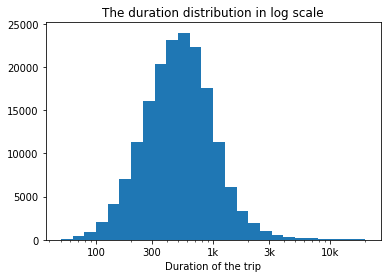

In [23]:
## Ploting in logrithmatic scale
log_binsize = 0.1 # step size
bin_size = 10 ** np.arange(1.7, 4.3+log_binsize, log_binsize)
plt.hist(data=trip_data,x='duration_sec',bins=bin_size);
plt.xscale('log')
plt.xticks([100, 300, 1000, 3000, 10000], [100, 300, '1k', '3k', '10k'])
plt.xlabel('Duration of the trip');
plt.title('The duration distribution in log scale');

## 2. Location and Distance Covered by the trip
 Studying the location I found out that there exist three location and some have the same start and end so this means that the bike didn't move so I had to get the distance to make sure found out that some distances are less than 0.0001 which means that these values are outliers while the rest of the plot is a unimodal distribution with mean of 0.01

In [21]:
## Making the distance column
trip_data['distance']=np.sqrt((trip_data.start_station_latitude-trip_data.end_station_latitude)**2 + 
                              (trip_data.start_station_longitude-trip_data.end_station_longitude)**2)

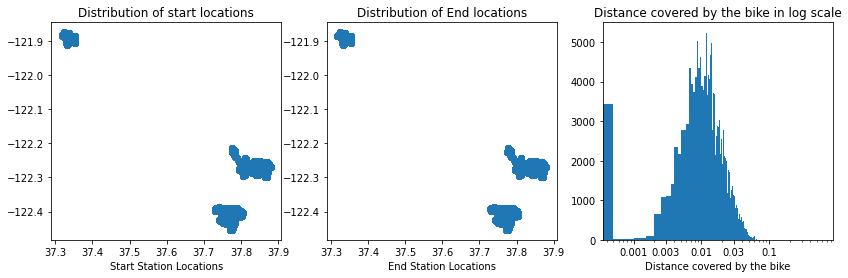

In [22]:
## ploting the end and start location distribution
## as they are numrical data i will use scatter plot
plt.figure(figsize=[14,4])
plt.subplot(1, 3, 1)
plt.scatter(data=trip_data, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')
plt.title('Distribution of start locations');
plt.subplot(1, 3, 2)
plt.scatter(data=trip_data, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');
plt.title('Distribution of End locations');
plt.subplot(1,3,3)
log_binsize = 0.0005 # step size
bin_size = np.arange(0, 0.6+log_binsize, log_binsize)
plt.hist(data=trip_data,x='distance',bins=bin_size);
plt.xscale('log')
plt.xticks([0.001, 0.003, 0.01, 0.03, 0.1], [0.001, 0.003, 0.01, 0.03, 0.1])
plt.xlabel('Distance covered by the bike')
plt.title('Distance covered by the bike in log scale');

## 3. Day of the week 

I studied the days which people perefere to ride their bike found out that thrsday is the most picked day by the people to take their bike so if we want to increase the profit on the days that is not popular like snday and saturday we can make an offer on these days

In [15]:
from datetime import datetime
# extractig the date from the columns
trip_data['start_date']=trip_data.start_time.map(lambda x: x[:10])
trip_data['start_date']=trip_data.start_date.map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
trip_data['day_week']=trip_data.start_date.map(lambda x:x.dayofweek)

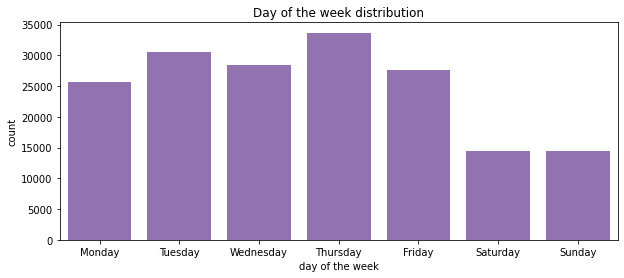

In [18]:
plt.figure(figsize=[10,4])
color=sns.color_palette()[4]
sns.countplot(data=trip_data, x='day_week', color=color);
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('day of the week');
plt.title("Day of the week distribution");

## 4. Duration vs Birth year
Sudying these two features together is really important Found out that the young people tends to take longer trips so we can focus the pormotion of bikes on them.


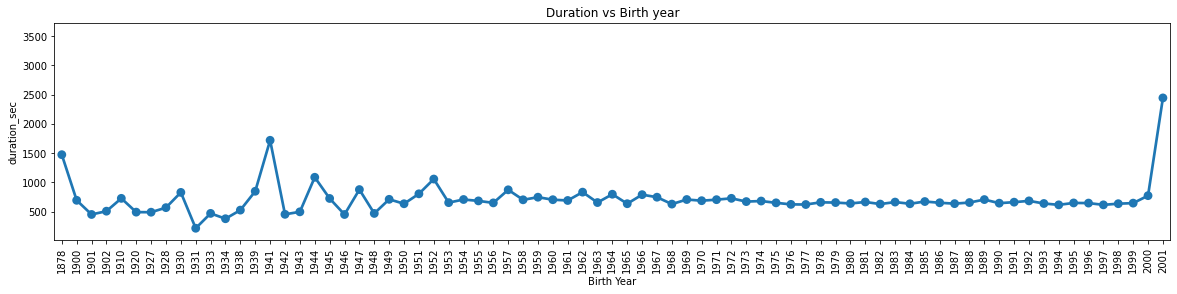

In [24]:
plt.figure(figsize=[20, 4])
sns.pointplot(data=trip_data, x='member_birth_year', y='duration_sec', errwidth=0)
plt.xticks(rotation=90)
plt.xlabel('Birth Year')
plt.ylabel('duration_sec');
plt.title("Duration vs Birth year");

## 5. Duration vs. User Type vs. Member Gender
When comparing these three features together it turns out that the customer tends to make longer trips than the subscriber and also the female customer tends to make longer trips than male customer So we need to increase the pormotion to customers specially females.


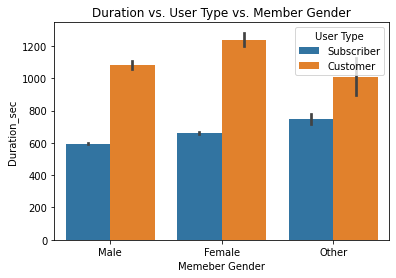

In [25]:

sns.barplot(data=trip_data, x='member_gender', y='duration_sec', hue='user_type')
plt.xlabel('Memeber Gender')
plt.ylabel('Duration_sec')
plt.legend(title='User Type');
plt.title("Duration vs. User Type vs. Member Gender");

In [ ]:
!jupyter nbconvert Ford_Gobike_TripData_Explanation.ipynb --to slides --post serve --no-input --no-prompt
